# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory code below

In [1]:
# Write your answer here
print("Yukai Chen \n S2539356")

Yukai Chen 
 S2539356


<font size = "5" >
This quiz is open book 

- You can use the lecture notes and Google
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"

**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**

In [5]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", and "pandas"

In [2]:
# Write your answer here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

Import the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting

In [5]:
# Write your own code
basic = pd.read_csv("data_quiz/fifa23_players_basic.csv")


<font size = "5">

(a) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "overall"
- If "overall < 85", status = "Regular Player"
- If "age_player >= 85", status = "Top Player"
- The function returns "status"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "top_players" <br>
to assign each player to the correct status

HINT: Use the ".apply()" function

In [47]:
# Write your own code
def state(overall):
    if overall<85:
        status= "Regular Player"
    else:
        status= "Top Player"
    return status

basic["top_players"] = basic["Overall"].apply(state)

print(basic[["Full Name","top_players"]])

                Full Name      top_player
0            Lionel Messi      Top Player
1           Karim Benzema      Top Player
2      Robert Lewandowski      Top Player
3         Kevin De Bruyne      Top Player
4           Kylian Mbappé      Top Player
...                   ...             ...
18534      Darren Collins  Regular Player
18535        Dejiang Yang  Regular Player
18536         Liam Mullan  Regular Player
18537    Daithí McCallion  Regular Player
18538         Nabin Rabha  Regular Player

[18539 rows x 2 columns]


<font size = "5">

(b) Use queries + global variables

<font size = "3">

- Compute the mean of the column "Wage(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 9) <br>
Reference the column as ``` `Wage(in Euro)`    ``` inside .query()

In [40]:
# Write your own code
threshold = np.mean(basic["Wage(in Euro)"])

above_threshold = basic.query("`Wage(in Euro)` > @threshold")
print(above_threshold)

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players
- Print their age

In [18]:
# Write your own code

sorted_basic = basic.sort_values(by='Age')
youngest_5 = sorted_basic.iloc[:5]
print(youngest_5['Age'])

17956    16
18014    16
16084    16
11481    16
17591    16
Name: Age, dtype: int64


<font size = "5">

(d) Create a function with four inputs $f(y,x,b0,b1)$

<font size = "3">

$\qquad e2 = (y - b_0 - b_1 * x)^2$

- The function should return the mean of e2
- This is the mean-square error (mse)
- Call the function "fn_mse"
- Let $y$ be the column "Potential"
- Let $x$ be the column "Age" 
- Does <br>
$\qquad (b_0 = 80, b_1 = 0.4)$ or <br>
$\qquad (b_0 = 80, b_1 =-0.3)$ or <br>
$\qquad (b_0 = 80, b_1 = -0.5)$ <br>
produce the lowest value of mse?
- Print your results

In [50]:
# Write your own code
def fn_mse(y,x,b0,b1):
    e2 = (y - b0 - b1 * x)**2
    return np.mean(e2)
y = basic["Potential"]
x = basic["Age"]

print(" b0 = 80, b1=0.4 gives", fn_mse(y,x,80,0.4), ". \n b0 = 80, b1 = -0.3 gives", fn_mse(y,x,80,-0.3), ". \n b0 = 80, b1 = -0.5 gives",fn_mse(y,x,80,-0.5),"." )

## b1 = -0.3 gives the lowest

 b0 = 80, b1=0.4 gives 412.1016840174767 . 
 b0 = 80, b1 = -0.3 gives 37.72189870003776 . 
 b0 = 80, b1 = -0.5 gives 49.43713253142025 .


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Create ``` list_status = [0,1]```
- Create ``` list_prob = [0.5, 0.5]```
- Create a new variable $n$ with the number of rows of the dataset
- Define a random seed that equals 42

- Use 
```python
    np.random.choice(list_status,
                     size = n,
                     p = list_prob)
```
$\qquad$ to create a new column called "status" <br>
$\qquad$ which randomly assigns each row to "0" or "1" <br>
$\qquad$ with equal probability
- Use .query() to subset all observations with status == 0.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with status == 1.<br>
store it in a new dataset called "data1"



In [38]:
# Write your own code
list_status = [0,1]
list_prob = [0.5, 0.5]
n = len(basic)
np.random.seed(42)

basic['status'] = np.random.choice(list_status, size=n, p=list_prob)

data0 = basic.query("status == 0 ")
data1 = basic.query("status == 1 ")

print(data0)
print(data1)

<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1"
- Use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

- Provide a short interpretation of the graph using the information from the Note

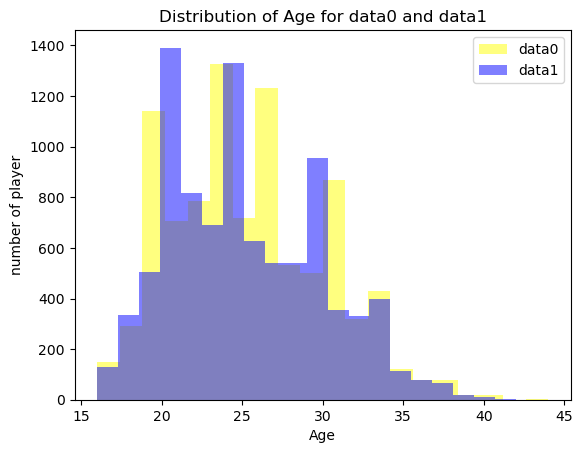

In [42]:
# Write your own code
plt.hist(data0['Age'], bins=20, alpha=0.5, label='data0', color='yellow')

# Plotting the histogram for data1
plt.hist(data1['Age'], bins=20, alpha=0.5, label='data1',color='blue')

# Adding title and labels
plt.title('Distribution of Age for data0 and data1')
plt.xlabel('Age')
plt.ylabel('number of player')
plt.legend(loc='upper right')

# Displaying the plot
plt.show()

## The age exhibits a right skew distribution and the groups shows similar means. From the graph we can interpret that most of the players in the dataset are around age of 20-30.